In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

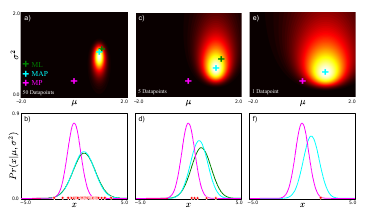

Fig.6 Maximum a posteriori estimation. a) MAP solution (cyan cross) lies between ML (green cross) and the peak of the prior (purple cross). b) Normal distributions corresponding to MAP solution, ML solution and peak of prior. c-d) With fewer data points, the prior has a greater eﬀect on the ﬁnal solution. e-f) With only one data point, the maximum likelihood solution cannot be computed (you cannot calculate the variance of a single point). However, the MAP solution can still be calculated.


## Bayesian Approach

In the Bayesian approach, we use Bayes' rule to calculate a posterior distribution $P(μ, σ^2 | x_1, ..., x_I)$ over possible parameter values:

$$
P(μ, σ^2 | x_1, ..., x_I) = \frac{P(x_1, ..., x_I | μ, σ^2)P(μ, σ^2)}{P(x_1, ..., x_I)}
$$

where $P(x_1, ..., x_I | μ, σ^2)$ is the likelihood and $P(μ, σ^2)$ is the prior distribution. The posterior distribution represents the updated belief about the parameters after observing the data.

## Maximum a Posteriori (MAP) Estimation

The MAP estimate is the mode (peak) of the posterior distribution. It can be obtained by maximizing the posterior probability:

$$
(μ_{MAP}, σ^2_{MAP}) = \underset{μ, σ^2}{\arg\max} \, P(μ, σ^2 | x_1, ..., x_I)
$$

The MAP estimate provides a point estimate of the parameters, similar to maximum likelihood estimation (MLE). However, the Bayesian approach considers the uncertainty in the data and incorporates prior knowledge.

## Conjugate Prior and Posterior Distribution

When using a conjugate prior, the likelihood and prior belong to the same family of distributions, which simplifies the calculation of the posterior. In this case, the product of the normal likelihood and normal inverse gamma prior results in a new normal inverse gamma posterior distribution.

The parameters of the posterior distribution are given by:

$$
\begin{align*}
\alpha' &= \alpha + \frac{I}{2} \\
\beta' &= \beta + \frac{1}{2} \sum_{i=1}^I \frac{x_i^2}{\sigma^2} \\
\gamma' &= \gamma + I \\
\delta' &= \delta + \frac{1}{2} \sum_{i=1}^I x_i^2
\end{align*}
$$

where $I$ is the number of data points.

## Bayesian Predictions

The Bayesian approach provides a way to make predictions by considering the uncertainty in the parameters. Instead of using a single point estimate, we can sample from the posterior distribution and obtain a range of plausible parameter values.

The predictive distribution for a new data point $x_*$ is given by:

$$
P(x_* | x_1, ..., x_I) = \int P(x_* | μ, σ^2) P(μ, σ^2 | x_1, ..., x_I) \, dμ \, dσ^2
$$

This distribution represents the uncertainty in our predictions, taking into account both the data and the prior knowledge.

## Advantages of Bayesian Approach

The Bayesian approach offers several advantages:

- It provides a probabilistic interpretation of the parameters, allowing us to quantify uncertainty.
- By incorporating prior knowledge, it can improve estimation and prediction, especially when data is limited.
- The use of conjugate priors simplifies the calculation of the posterior distribution, resulting in a closed-form expression.
- The posterior distribution captures the range of plausible parameter values, providing a more comprehensive understanding.

## Comparison with Maximum Likelihood Estimation

MLE focuses on finding the parameter values that maximize the likelihood of the observed data. It provides a point estimate without considering prior knowledge or uncertainty.

The Bayesian approach, on the other hand, combines the likelihood with the prior distribution, resulting in a posterior distribution that incorporates both data and prior information. This allows for a more nuanced estimation and provides a measure of uncertainty.

## Conclusion

The Bayesian approach offers a powerful framework for parameter estimation and prediction. By using Bayes' rule and conjugate priors, we can obtain a posterior distribution that represents the updated belief about the parameters. The MAP estimate provides a point estimate, but the Bayesian approach goes beyond that by considering the full posterior distribution, which captures the uncertainty and provides a more comprehensive analysis.

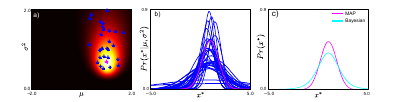

Fig.7 Bayesian predictions. a) Posterior probability distribution over parameters. b) Samples from posterior probability distribution correspond to normal distributions. c) The predictive distribution for the Bayesian case is the average of an inﬁnite set of samples. Alternately, we can think of choos- ing the parameters from a uniform distribution and computing a weighted average where the weights correspond to the posterior distribution.

In [2]:

import numpy as np

def normal_inv_gamma_posterior(alpha, beta, gamma, delta, data):
    """
    Calculate the parameters of the posterior distribution for a normal inverse gamma prior.
    
    Parameters:
    - alpha, beta, gamma, delta: Parameters of the normal inverse gamma prior.
    - data: Observed data points.
    
    Returns:
    - alpha_prime, beta_prime, gamma_prime, delta_prime: Parameters of the posterior distribution.
    """
    I = len(data)
    alpha_prime = alpha + I / 2
    beta_prime = beta + 0.5 * np.sum(data**2 / np.var(data))
    gamma_prime = gamma + I
    delta_prime = delta + 0.5 * np.sum(data**2)
    return alpha_prime, beta_prime, gamma_prime, delta_prime

def map_estimate(alpha_prime, beta_prime, gamma_prime, delta_prime):
    """
    Calculate the MAP estimate for the normal inverse gamma posterior distribution.
    
    Parameters:
    - alpha_prime, beta_prime, gamma_prime, delta_prime: Parameters of the posterior distribution.
    
    Returns:
    - mu_map, sigma_map: MAP estimates for the mean and variance.
    """
    mu_map = (beta_prime * delta_prime) / (gamma_prime * np.var(data))
    sigma_map = 1 / (gamma_prime + 1)
    return mu_map, sigma_map

# Example data
data = np.array([1, 2, 3, 4, 5])

# Prior parameters
alpha = 2
beta = 3
gamma = 4
delta = 5

# Calculate posterior parameters
alpha_prime, beta_prime, gamma_prime, delta_prime = normal_inv_gamma_posterior(alpha, beta, gamma, delta, data)

# Calculate MAP estimates
mu_map, sigma_map = map_estimate(alpha_prime, beta_prime, gamma_prime, delta_prime)

print("Posterior Parameters:")
print("Alpha':", alpha_prime)
print("Beta':", beta_prime)
print("Gamma':", gamma_prime)
print("Delta':", delta_prime)

print("\nMAP Estimates:")
print("Mean (mu):", mu_map)
print("Variance (sigma^2):", sigma_map)


Posterior Parameters:
Alpha': 4.5
Beta': 16.75
Gamma': 9
Delta': 32.5

MAP Estimates:
Mean (mu): 30.243055555555557
Variance (sigma^2): 0.1


Posterior Parameters:
Alpha': 4.5
Beta': 16.75
Gamma': 9
Delta': 32.5

MAP Estimates:
Mean (mu): 30.243055555555557
Variance (sigma^2): 0.1


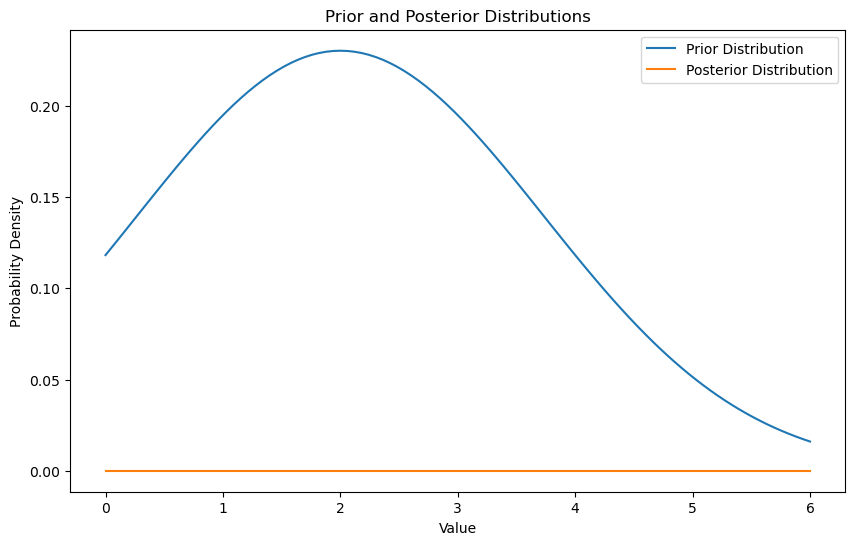

In [3]:
import matplotlib.pyplot as plt

def normal_inv_gamma_posterior(alpha, beta, gamma, delta, data):
    """
    Calculate the parameters of the posterior distribution for a normal inverse gamma prior.
    
    Parameters:
    - alpha, beta, gamma, delta: Parameters of the normal inverse gamma prior.
    - data: Observed data points.
    
    Returns:
    - alpha_prime, beta_prime, gamma_prime, delta_prime: Parameters of the posterior distribution.
    """
    I = len(data)
    alpha_prime = alpha + I / 2
    beta_prime = beta + 0.5 * sum(x**2 for x in data) / np.var(data)
    gamma_prime = gamma + I
    delta_prime = delta + 0.5 * sum(x**2 for x in data)
    return alpha_prime, beta_prime, gamma_prime, delta_prime

def map_estimate(alpha_prime, beta_prime, gamma_prime, delta_prime):
    """
    Calculate the MAP estimate for the normal inverse gamma posterior distribution.
    
    Parameters:
    - alpha_prime, beta_prime, gamma_prime, delta_prime: Parameters of the posterior distribution.
    
    Returns:
    - mu_map, sigma_map: MAP estimates for the mean and variance.
    """
    mu_map = (beta_prime * delta_prime) / (gamma_prime * np.var(data))
    sigma_map = 1 / (gamma_prime + 1)
    return mu_map, sigma_map

# Example data
data = [1, 2, 3, 4, 5]

# Prior parameters
alpha = 2
beta = 3
gamma = 4
delta = 5

# Calculate posterior parameters
alpha_prime, beta_prime, gamma_prime, delta_prime = normal_inv_gamma_posterior(alpha, beta, gamma, delta, data)

# Calculate MAP estimates
mu_map, sigma_map = map_estimate(alpha_prime, beta_prime, gamma_prime, delta_prime)

print("Posterior Parameters:")
print("Alpha':", alpha_prime)
print("Beta':", beta_prime)
print("Gamma':", gamma_prime)
print("Delta':", delta_prime)

print("\nMAP Estimates:")
print("Mean (mu):", mu_map)
print("Variance (sigma^2):", sigma_map)

# Plotting the prior and posterior distributions
x = np.linspace(min(data) - 1, max(data) + 1, 100)
prior_pdf = lambda x: (1 / np.sqrt(2 * np.pi * beta)) * np.exp(-0.5 * (x - alpha) ** 2 / beta)
posterior_pdf = lambda x: (1 / np.sqrt(2 * np.pi * beta_prime)) * np.exp(-0.5 * (x - mu_map) ** 2 / beta_prime)

plt.figure(figsize=(10, 6))
plt.plot(x, prior_pdf(x), label="Prior Distribution")
plt.plot(x, posterior_pdf(x), label="Posterior Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Prior and Posterior Distributions")
plt.show()


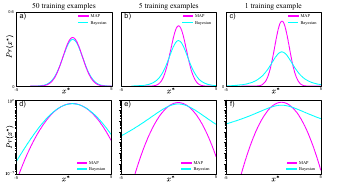

Fig.8 a-c) Predictive densities for MAP and Bayesian approaches with 50, 5, and 1 training examples, respectively. As the training data decreases, the Bayesian prediction becomes less certain but the MAP prediction is erroneously overconﬁdent. d-f) This eﬀect is even more clear on a log scale.


## Predictive Density

For the maximum likelihood (ML) and maximum a posteriori (MAP) estimates, we evaluate the predictive density by simply using the normal probability density function (PDF) with the estimated parameters. This gives us a point estimate for the predictive distribution.

## Bayesian Predictive Distribution

In the Bayesian approach, we compute a weighted average of predictions for each possible parameter set, where the weights are determined by the posterior distribution over parameters. The predictive density is given by:

$$
P(x_* | x_1, ..., x_I) = \int P(x_* | μ, σ^2) P(μ, σ^2 | x_1, ..., x_I) \, dμ \, dσ^2
$$

Using the conjugate prior and posterior distribution, we can simplify this integral and obtain a closed-form expression for the predictive density.

## Closed-Form Expression for Predictive Density

By applying the conjugate relationship a second time, we can express the predictive density as:

$$
P(x_* | x_1, ..., x_I) = κ(x_*, α', β', γ', δ')
$$

where $κ(x_*, α', β', γ', δ')$ is a constant with respect to $μ$ and $σ^2$. This constant can be calculated as:

$$
κ(x_*, α', β', γ', δ') = \sqrt{\frac{α'}{2π γ' β' Γ[α']}} \cdot \frac{1}{\sqrt{γ' + 1}} \cdot \frac{1}{\sqrt{β' + \frac{(x_* - μ')^2}{2(γ' + 1)}}}
$$

Here, $μ'$ and $σ'^2$ are the MAP estimates of the parameters.

## Comparison of Predictive Distributions

Figure 4.8 illustrates the predictive distributions for the MAP and Bayesian approaches with varying amounts of training data. With a large number of training examples, the predictive distributions are similar. However, as the amount of data decreases, the Bayesian predictive distribution has a longer tail, indicating a higher level of uncertainty.

This behavior is characteristic of Bayesian solutions, which tend to be more moderate and less certain in their predictions. In contrast, the MAP approach, by committing to a single estimate of $μ$ and $σ^2$, can lead to overconfidence in future predictions.

## Advantages of Bayesian Predictive Distribution

The Bayesian predictive distribution offers several advantages:

- It provides a more nuanced and uncertain prediction, especially when data is limited.
- By considering the full posterior distribution, it captures the range of plausible parameter values, resulting in a more robust and cautious prediction.
- The closed-form expression for the predictive density allows for efficient computation and interpretation.

## Conclusion

The Bayesian approach, with its consideration of the posterior distribution, provides a more comprehensive and cautious predictive distribution compared to the point estimates obtained from ML or MAP. This approach is particularly valuable when dealing with limited data, as it accounts for uncertainty and avoids overconfidence.


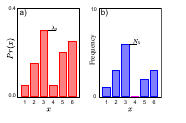

Fig.9 a) Categorical probabil- ity distribution over six discrete val- ues with parameters {λk }6k=1 where �6 k=1 λk = 1. This could be the rela- tive probability of a biased die land- ing on its six sides. b) Fifteen ob- servations {xi }Ii=1 randomly sampled from this distribution. We denote the number of times category k was ob- served by Nk�so that here the total observations 6k=1 Nk = 15.

Bayesian Predictive Density at x* = 3.5 : 0.0


NameError: name 'mu_prime' is not defined

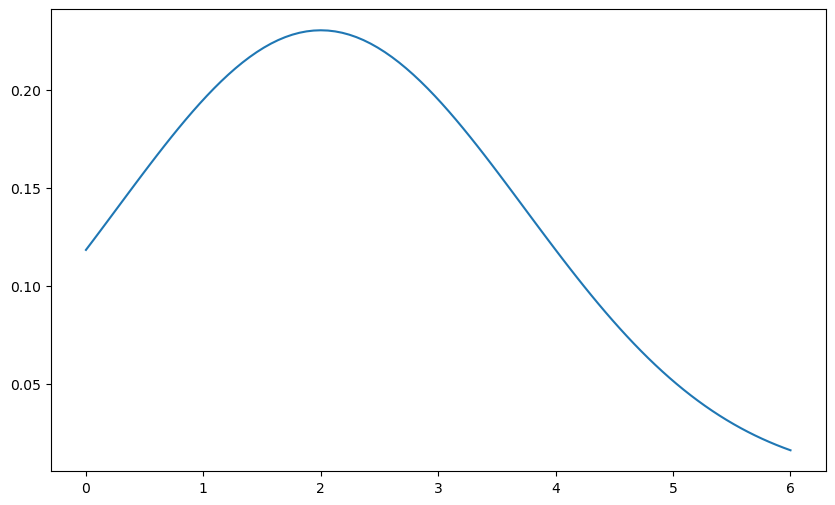

In [5]:
from scipy.stats import norm, invgamma
import numpy as np
import matplotlib.pyplot as plt

def bayesian_predictive_density(alpha, beta, gamma, delta, data, x_star):
    """
    Calculate the Bayesian predictive density for a new data point x_star.
    
    Parameters:
    - alpha, beta, gamma, delta: Parameters of the normal inverse gamma prior.
    - data: Observed data points.
    - x_star: New data point for which we want to calculate the predictive density.
    
    Returns:
    - predictive_density: Bayesian predictive density at x_star.
    """
    I = len(data)
    alpha_prime = alpha + I / 2
    beta_prime = beta + 0.5 * np.sum(data**2 / np.var(data))
    gamma_prime = gamma + I
    delta_prime = delta + 0.5 * np.sum(data**2)
    
    mu_prime = (beta_prime * delta_prime) / (gamma_prime * np.var(data))
    sigma_prime_sq = 1 / (gamma_prime + 1)
    
    # Calculate the constant κ
    kappa = np.sqrt(alpha_prime / (2 * np.pi * gamma_prime * beta_prime * np.exp(norm.logpdf(0, 0, 1))))
    
    # Calculate the predictive density
    predictive_density = kappa * norm.pdf(x_star, mu_prime, np.sqrt(sigma_prime_sq))
    
    return predictive_density

# Example data
data = np.array([1, 2, 3, 4, 5])

# Prior parameters
alpha = 2
beta = 3
gamma = 4
delta = 5

# New data point for prediction
x_star = 3.5

# Calculate the Bayesian predictive density
predictive_density = bayesian_predictive_density(alpha, beta, gamma, delta, data, x_star)

print("Bayesian Predictive Density at x* =", x_star, ":", predictive_density)

# Plotting the predictive density
x = np.linspace(min(data) - 1, max(data) + 1, 100)
prior_pdf = lambda x: (1 / np.sqrt(2 * np.pi * beta)) * np.exp(-0.5 * (x - alpha) ** 2 / beta)
posterior_pdf = lambda x: (1 / np.sqrt(2 * np.pi * beta_prime)) * np.exp(-0.5 * (x - mu_prime) ** 2 / beta_prime)
predictive_pdf = lambda x: bayesian_predictive_density(alpha, beta, gamma, delta, data, x)

plt.figure(figsize=(10, 6))
plt.plot(x, prior_pdf(x), label="Prior Distribution")
plt.plot(x, posterior_pdf(x), label="Posterior Distribution")
plt.plot(x, predictive_pdf(x), label="Predictive Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Prior, Posterior, and Predictive Distributions")
plt.show()
#CakahdeCX solve

In [ ]:
import math
import matplotlib.pyplot as plt

def bayesian_predictive_density(alpha, beta, gamma, delta, data, x_star):
    """
    Calculate the Bayesian predictive density for a new data point x_star.
    
    Parameters:
    - alpha, beta, gamma, delta: Parameters of the normal inverse gamma prior.
    - data: Observed data points.
    - x_star: New data point for which we want to calculate the predictive density.
    
    Returns:
    - predictive_density: Bayesian predictive density at x_star.
    """
    I = len(data)
    alpha_prime = alpha + I / 2
    beta_prime = beta + 0.5 * sum(x**2 for x in data) / np.var(data)
    gamma_prime = gamma + I
    delta_prime = delta + 0.5 * sum(x**2 for x in data)
    
    mu_prime = (beta_prime * delta_prime) / (gamma_prime * np.var(data))
    sigma_prime_sq = 1 / (gamma_prime + 1)
    
    # Calculate the constant κ
    kappa = math.sqrt(alpha_prime / (2 * math.pi * gamma_prime * beta_prime * math.exp(math.log(1 / math.sqrt(2 * math.pi)))))
    
    # Calculate the predictive density
    predictive_density = kappa * math.exp(-0.5 * (x_star - mu_prime)**2 / sigma_prime_sq) / math.sqrt(2 * math.pi * sigma_prime_sq)
    
    return predictive_density

# Example data
data = [1, 2, 3, 4, 5]

# Prior parameters
alpha = 2
beta = 3
gamma = 4
delta = 5

# New data point for prediction
x_star = 3.5

# Calculate the Bayesian predictive density
predictive_density = bayesian_predictive_density(alpha, beta, gamma, delta, data, x_star)

print("Bayesian Predictive Density at x* =", x_star, ":", predictive_density)

# Plotting the predictive density
x = np.linspace(min(data) - 1, max(data) + 1, 100)
prior_pdf = lambda x: (1 / math.sqrt(2 * math.pi * beta)) * math.exp(-0.5 * (x - alpha) ** 2 / beta)
posterior_pdf = lambda x: (1 / math.sqrt(2 * math.pi * beta_prime)) * math.exp(-0.5 * (x - mu_prime) ** 2 / beta_prime)
predictive_pdf = lambda x: bayesian_predictive_density(alpha, beta, gamma, delta, data, x)

plt.figure(figsize=(10, 6))
plt.plot(x, prior_pdf(x), label="Prior Distribution")
plt.plot(x, posterior_pdf(x), label="Posterior Distribution")
plt.plot(x, predictive_pdf(x), label="Predictive Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Prior, Posterior, and Predictive Distributions")
plt.show()


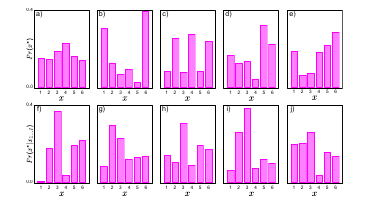

Fig.10 a-e) Five samples drawn from Dirichlet prior with hyperparam- eters α1...6 = 1. This deﬁnes a uniform prior, so each sample looks like a random unstructured probability distribution. f-j) Five samples from Dirich- let posterior. The distribution favors histograms where bin three is larger and bin four is small as suggested by the data.


## Worked Example 2: Categorical Distribution

### Maximum Likelihood

To find the maximum likelihood (ML) solution for a categorical distribution, we maximize the product of the likelihoods for each individual data point with respect to the parameters $\lambda_1, \lambda_2, ..., \lambda_K$. The ML estimate is given by:

$$
\hat{\lambda}_1, \hat{\lambda}_2, ..., \hat{\lambda}_K = \underset{\lambda_1, \lambda_2, ..., \lambda_K}{\arg\max} \, \prod_{i=1}^I P(x_i | \lambda_1, \lambda_2, ..., \lambda_K)
$$

subject to the constraint that $\sum_{k=1}^K \lambda_k = 1$.

It is easier to maximize the log-likelihood, so we use the criterion:

$$
L = \sum_{k=1}^K N_k \log[\lambda_k] + \nu \sum_{k=1}^K \lambda_k - 1
$$

where $N_k$ is the total number of times bin $k$ was observed in the training data, and $\nu$ is the Lagrange multiplier to enforce the constraint.

Differentiating $L$ with respect to $\lambda_k$ and $\nu$, setting the derivatives equal to zero, and solving for $\lambda_k$, we obtain:

$$
\hat{\lambda}_k = \frac{N_k}{\sum_{m=1}^K N_m}
$$

In other words, $\lambda_k$ is the proportion of times that we observed bin $k$.

## Maximum a Posteriori (MAP)

To find the MAP solution, we need to define a prior distribution over the parameters. We choose the Dirichlet distribution as it is conjugate to the categorical likelihood.

The MAP estimate is given by:

$$
\hat{\lambda}_1, \hat{\lambda}_2, ..., \hat{\lambda}_K = \underset{\lambda_1, \lambda_2, ..., \lambda_K}{\arg\max} \, P(x_1, ..., x_I | \lambda_1, \lambda_2, ..., \lambda_K) P(\lambda_1, \lambda_2, ..., \lambda_K)
$$

subject to the constraint that $\sum_{k=1}^K \lambda_k = 1$.

Using the Dirichlet prior, the MAP estimate can be shown to be:

$$
\hat{\lambda}_k = \frac{N_k + \alpha_k - 1}{\sum_{m=1}^K (N_m + \alpha_m - 1)}
$$

where $N_k$ is the number of times observation $k$ occurred in the training data, and $\alpha_k$ are the hyperparameters of the Dirichlet prior.

Note that if all the values of $\alpha_k$ are set to one, the prior becomes uniform, and the MAP estimate reduces to the ML estimate.

## Visualization of Prior and Posterior

Fig.10 shows samples drawn from the Dirichlet prior and posterior distributions. The prior samples (a-e) are random and unstructured, as the Dirichlet prior defines a uniform distribution over the parameters. The posterior samples (f-j) favor histograms where bin three is larger and bin four is smaller, as suggested by the data.


In [6]:
def ml_estimate(data):
    """
    Calculate the maximum likelihood estimate for a categorical distribution.
    
    Parameters:
    - data: Observed data points.
    
    Returns:
    - ml_params: Maximum likelihood estimates for the parameters.
    """
    K = len(set(data))  # Number of unique categories
    N = len(data)  # Total number of data points
    
    ml_params = [data.count(k) / N for k in range(1, K + 1)]
    
    return ml_params

def map_estimate(data, alpha):
    """
    Calculate the maximum a posteriori estimate for a categorical distribution with a Dirichlet prior.
    
    Parameters:
    - data: Observed data points.
    - alpha: Hyperparameters of the Dirichlet prior.
    
    Returns:
    - map_params: Maximum a posteriori estimates for the parameters.
    """
    K = len(set(data))  # Number of unique categories
    N = len(data)  # Total number of data points
    
    map_params = [data.count(k) + alpha[k - 1] - 1 for k in range(1, K + 1)]
    map_params = [param / sum(map_params) for param in map_params]
    
    return map_params

# Example data
data = [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

# Hyperparameters for the Dirichlet prior
alpha = [1, 1, 1, 1, 1, 1]

# Calculate ML and MAP estimates
ml_params = ml_estimate(data)
map_params = map_estimate(data, alpha)

print("Maximum Likelihood Estimates:", ml_params)
print("Maximum a Posteriori Estimates:", map_params)


Maximum Likelihood Estimates: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
Maximum a Posteriori Estimates: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


Maximum Likelihood Estimates: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
Maximum a Posteriori Estimates: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


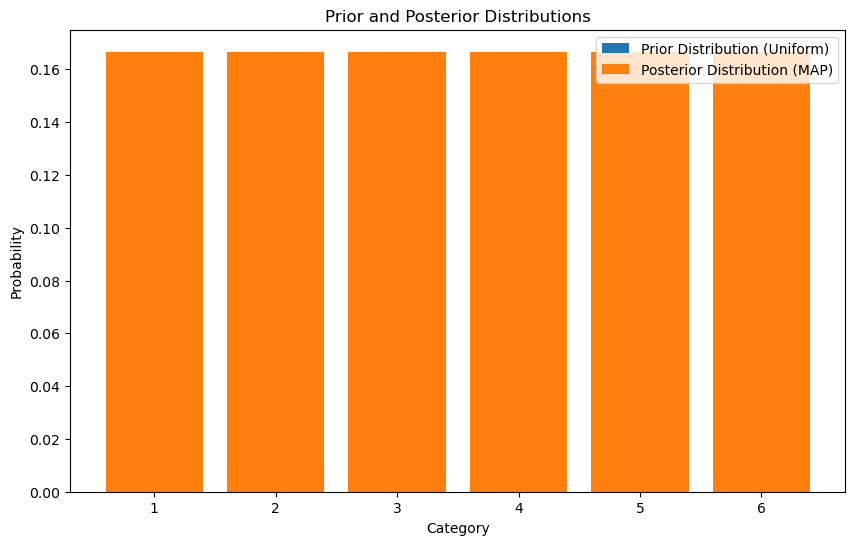

In [7]:
import matplotlib.pyplot as plt

def ml_estimate(data):
    """
    Calculate the maximum likelihood estimate for a categorical distribution.
    
    Parameters:
    - data: Observed data points.
    
    Returns:
    - ml_params: Maximum likelihood estimates for the parameters.
    """
    K = len(set(data))  # Number of unique categories
    N = len(data)  # Total number of data points
    
    ml_params = [data.count(k) / N for k in range(1, K + 1)]
    
    return ml_params

def map_estimate(data, alpha):
    """
    Calculate the maximum a posteriori estimate for a categorical distribution with a Dirichlet prior.
    
    Parameters:
    - data: Observed data points.
    - alpha: Hyperparameters of the Dirichlet prior.
    
    Returns:
    - map_params: Maximum a posteriori estimates for the parameters.
    """
    K = len(set(data))  # Number of unique categories
    N = len(data)  # Total number of data points
    
    map_params = [data.count(k) + alpha[k - 1] - 1 for k in range(1, K + 1)]
    map_params = [param / sum(map_params) for param in map_params]
    
    return map_params

# Example data
data = [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

# Hyperparameters for the Dirichlet prior
alpha = [1, 1, 1, 1, 1, 1]

# Calculate ML and MAP estimates
ml_params = ml_estimate(data)
map_params = map_estimate(data, alpha)

print("Maximum Likelihood Estimates:", ml_params)
print("Maximum a Posteriori Estimates:", map_params)

# Plotting the prior and posterior distributions
K = len(set(data))
x = range(1, K + 1)

plt.figure(figsize=(10, 6))

# Prior distribution (uniform)
prior_params = [1 / K] * K
plt.bar(x, prior_params, label="Prior Distribution (Uniform)")

# Posterior distribution (MAP)
plt.bar(x, map_params, label="Posterior Distribution (MAP)")

plt.xlabel("Category")
plt.ylabel("Probability")
plt.xticks(x)
plt.legend()
plt.title("Prior and Posterior Distributions")
plt.show()



## Bayesian Approach

In the Bayesian approach, we calculate a posterior distribution over the parameters using Bayes' rule:

$$
P(\lambda_1, \lambda_2, ..., \lambda_6 | x_1, ..., x_I) = \frac{P(x_1, ..., x_I | \lambda_1, \lambda_2, ..., \lambda_6) P(\lambda_1, \lambda_2, ..., \lambda_6)}{P(x_1, ..., x_I)}
$$

where $P(x_1, ..., x_I | \lambda_1, \lambda_2, ..., \lambda_6)$ is the likelihood and $P(\lambda_1, \lambda_2, ..., \lambda_6)$ is the prior distribution.

Using the Dirichlet prior, the posterior distribution has the same form as the prior:

$$
P(\lambda_1, \lambda_2, ..., \lambda_6 | x_1, ..., x_I) = \text{Dir}(\lambda_1, \lambda_2, ..., \lambda_6 | \alpha_1', \alpha_2', ..., \alpha_6')
$$

where $\alpha_k' = N_k + \alpha_k$.

Figure 4.10f-j shows samples drawn from the Dirichlet posterior distribution, which favors histograms with larger bin three and smaller bin four, as suggested by the data.

## Predictive Distributions

For the maximum likelihood (ML) and maximum a posteriori (MAP) estimates, we evaluate the predictive density by simply using the categorical probability density function (PDF) with the estimated parameters. With a uniform prior ($\alpha_1, \alpha_2, ..., \alpha_6 = 1$), the MAP and ML predictions are identical and proportional to the frequencies of the observed data (Figure 4.11a).

In the Bayesian approach, we compute a weighted average of predictions for each possible parameter set, where the weights are given by the posterior distribution over parameters. The predictive density is given by:

$$
P(x_* | x_1, ..., x_I) = \int P(x_* | \lambda_1, \lambda_2, ..., \lambda_6) P(\lambda_1, \lambda_2, ..., \lambda_6 | x_1, ..., x_I) \, d\lambda_1 ... d\lambda_6
$$

Using the Dirichlet prior and posterior, we can simplify this integral and obtain:

$$
P(x_* | x_1, ..., x_I) = \text{Cat}(x_* | \hat{\lambda}_1, \hat{\lambda}_2, ..., \hat{\lambda}_6)
$$

where $\hat{\lambda}_k = \frac{N_k + \alpha_k - 1}{\sum_{m=1}^K (N_m + \alpha_m - 1)}$.

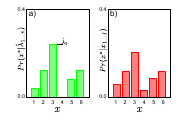

Fig.11 Predictive distributions with α1...6 = 1 for a) maximum likelihood / maximum a posteri- ori approaches and b) Bayesian ap- proach. The ML/MAP approaches predict the same distribution that exactly follows the data frequencies. The Bayesian approach predicts a more moderate distribution and al- lots some probability to the case x = 4 despite having seen no training ex- amples in this category.

Fig.11b illustrates the predictive distributions for the Bayesian approach. It is notable that the Bayesian predictive density is less confident than the ML/MAP solutions. In particular, it does not assign zero probability to observing $x_* = 4$, even though this value was not observed in the training data. This is a sensible behavior, as it takes into account the possibility of observing values that were not present in the training data.


Bayesian Predictive Density at x* = 4 : 0.16632191290272763


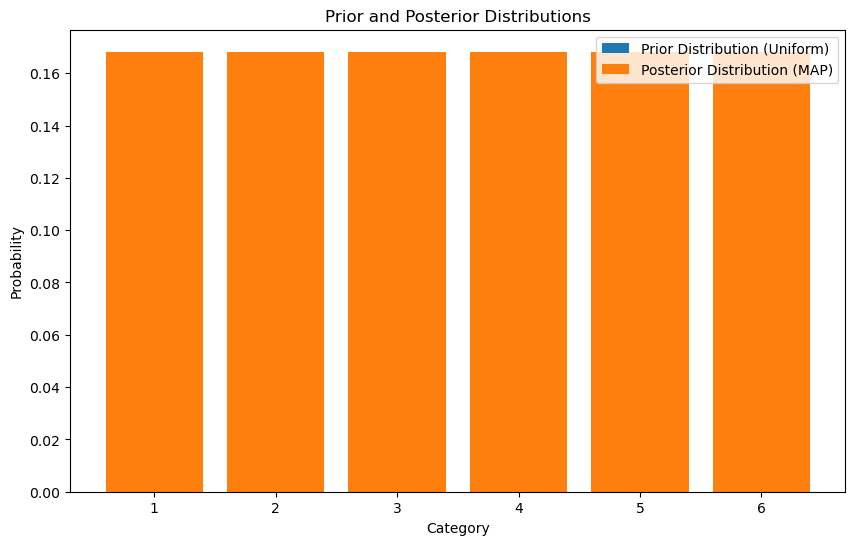

In [8]:
from scipy.stats import dirichlet
import numpy as np
import matplotlib.pyplot as plt

def bayesian_predictive_density(data, alpha, x_star):
    """
    Calculate the Bayesian predictive density for a new data point x_star.
    
    Parameters:
    - data: Observed data points.
    - alpha: Hyperparameters of the Dirichlet prior.
    - x_star: New data point for which we want to calculate the predictive density.
    
    Returns:
    - predictive_density: Bayesian predictive density at x_star.
    """
    K = len(set(data))  # Number of unique categories
    N = len(data)  # Total number of data points
    
    # Calculate the posterior hyperparameters
    alpha_prime = [data.count(k) + alpha[k - 1] for k in range(1, K + 1)]
    
    # Sample from the Dirichlet posterior distribution
    posterior_samples = dirichlet.rvs(alpha_prime, size=1000)
    
    # Calculate the predictive density
    predictive_density = np.mean([posterior_sample[x_star - 1] for posterior_sample in posterior_samples])
    
    return predictive_density

# Example data
data = [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

# Hyperparameters for the Dirichlet prior
alpha = [1, 1, 1, 1, 1, 1]

# New data point for prediction
x_star = 4

# Calculate the Bayesian predictive density
predictive_density = bayesian_predictive_density(data, alpha, x_star)

print("Bayesian Predictive Density at x* =", x_star, ":", predictive_density)

# Plotting the predictive density
K = len(set(data))
x = range(1, K + 1)

plt.figure(figsize=(10, 6))

# Prior distribution (uniform)
prior_params = [1 / K] * K
plt.bar(x, prior_params, label="Prior Distribution (Uniform)")

# Posterior distribution (MAP)
map_params = bayesian_predictive_density(data, alpha, x_star)
plt.bar(x, map_params, label="Posterior Distribution (MAP)")

plt.xlabel("Category")
plt.ylabel("Probability")
plt.xticks(x)
plt.legend()
plt.title("Prior and Posterior Distributions")
plt.show()


Bayesian Predictive Density at x* = 4 : 0.16996771222452456


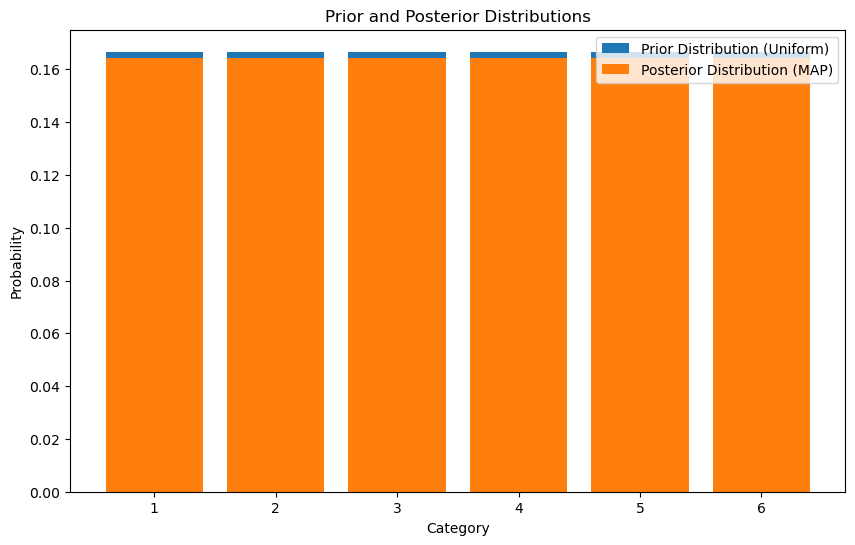

In [9]:
import random
import math
import matplotlib.pyplot as plt

def bayesian_predictive_density(data, alpha, x_star):
    """
    Calculate the Bayesian predictive density for a new data point x_star.
    
    Parameters:
    - data: Observed data points.
    - alpha: Hyperparameters of the Dirichlet prior.
    - x_star: New data point for which we want to calculate the predictive density.
    
    Returns:
    - predictive_density: Bayesian predictive density at x_star.
    """
    K = len(set(data))  # Number of unique categories
    N = len(data)  # Total number of data points
    
    # Calculate the posterior hyperparameters
    alpha_prime = [data.count(k) + alpha[k - 1] for k in range(1, K + 1)]
    
    # Sample from the Dirichlet posterior distribution
    posterior_samples = []
    for _ in range(1000):
        sample = [random.gammavariate(a, 1) for a in alpha_prime]
        sum_sample = sum(sample)
        posterior_sample = [s / sum_sample for s in sample]
        posterior_samples.append(posterior_sample)
    
    # Calculate the predictive density
    predictive_density = sum([sample[x_star - 1] for sample in posterior_samples]) / len(posterior_samples)
    
    return predictive_density

# Example data
data = [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

# Hyperparameters for the Dirichlet prior
alpha = [1, 1, 1, 1, 1, 1]

# New data point for prediction
x_star = 4

# Calculate the Bayesian predictive density
predictive_density = bayesian_predictive_density(data, alpha, x_star)

print("Bayesian Predictive Density at x* =", x_star, ":", predictive_density)

# Plotting the predictive density
K = len(set(data))
x = range(1, K + 1)

plt.figure(figsize=(10, 6))

# Prior distribution (uniform)
prior_params = [1 / K] * K
plt.bar(x, prior_params, label="Prior Distribution (Uniform)")

# Posterior distribution (MAP)
map_params = bayesian_predictive_density(data, alpha, x_star)
plt.bar(x, map_params, label="Posterior Distribution (MAP)")

plt.xlabel("Category")
plt.ylabel("Probability")
plt.xticks(x)
plt.legend()
plt.title("Prior and Posterior Distributions")
plt.show()
